In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

### Primer paso
* Cargar el dataset

In [17]:
iris = pd.read_csv('Iris (1).csv')
seeds = pd.read_csv('seeds_dataset.csv')
cancer = pd.read_csv('BreastCancer_dataset.csv')

In [55]:
nombres_semillas = [
    'area', 'perimetro', 'compacidad', 'longitud_nucleo', 
    'ancho_nucleo', 'coef_asimetria', 'longitud_surco', 'clase'
]
seeds.columns = nombres_semillas

### Segundo paso
* Damos un vistazo a nuestro dataset

In [49]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [50]:
seeds.head(-5)


,area,perimetro,compacidad,longitud_nucleo,ancho_nucleo,coef_asimetria,longitud_surco,clase
0,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
1,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
2,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
3,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
4,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1
...,...,...,...,...,...,...,...,...
199,12.38,13.44,0.8609,5.219,2.989,5.472,5.045,3
200,12.67,13.32,0.8977,4.984,3.135,2.300,4.745,3
201,11.18,12.72,0.8680,5.009,2.810,4.051,4.828,3
202,12.70,13.41,0.8874,5.183,3.091,8.456,5.000,3


In [20]:
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [21]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [22]:
seeds.describe()

,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,14.847368,14.559234,0.870950,5.628890,3.258249,3.713034,5.410234,2.004785
std,2.916685,1.309094,0.023676,0.444097,0.378586,1.495593,0.491658,0.817463
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.260000,13.450000,0.856700,5.262000,2.941000,2.587000,5.045000,1.000000
50%,14.340000,14.290000,0.873400,5.520000,3.232000,3.600000,5.224000,2.000000
75%,17.320000,15.730000,0.887900,5.980000,3.562000,4.773000,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [23]:
cancer.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


Antes de construir, necesitamos normalizar
* El primer punto a observar es que en el peor de los casos tenemos 0, pero tenemos un $1 \times 10^{-3}$

### Construimos una funcion que nos ayude a contar decimales.

In [24]:
def contar_ceros_decimales(numero):

    """ Estas funcion nos ayuda a contar los 0 que hay despues del punto decimal, para poder convertirlos a enteros """
    # Verificamos que no sea un entero ya
    if numero % 1 == 0:
        return 0

    texto = "{:.20f}".format(numero)
    if '.' not in texto:
        return 0
        
    decimales = texto.split('.')[1]
    
    contador = 0
    for digito in decimales:
        if digito == '0':
            contador += 1
        else:
            break 
            
    return contador

### Normalizamos nuestro dataset

In [25]:
def normalizador(df_entrada):
    # Hacemos una copia del dataset
    df = df_entrada.copy()
    #Eliminamos las columnas que no necesitamos, como identificadores.
    df.drop(['id', 'Id', 'ID'], axis=1, inplace=True, errors='ignore')
    df.dropna(axis=1, how='all', inplace=True)
    #Seleccionamos las columnas que solamente sean numericas 
    cols = df.select_dtypes(include=[np.number]).columns
    #Ahora obtenemos los minimos de cada columna
    minimos = df[cols].min()
    #Desechamos los 0
    minimos = minimos[minimos != 0] 
    #Contamos los 0 que tiene
    numero_de_ceros = minimos.apply(contar_ceros_decimales)
    
    n_global = 0
    if not numero_de_ceros.empty:
        n_global = numero_de_ceros.max()
    # Si tenemos mas de 3 0's cambiamos de estrategia 
    if n_global >= 3:
        #Seleccionamos el rango en el que queremos que esten nuestros numeros
        rango_deseado = 1000 
        
        for col in cols:
            min_val = df[col].min()
            max_val = df[col].max()
            
            if max_val - min_val == 0:
                df[col] = 0
            else:
                #aplicamos normalizacion min-max
                df[col] = ((df[col] - min_val) / (max_val - min_val)) * rango_deseado
            #redondeamos y convertimos a entero
            df[col] = df[col].round(0).astype(int)

    else:
        # Si no hay 0's, significa que multiplicaremos por 1
        if numero_de_ceros.empty:
            factor_global = 1
        else:
        #Si hay algun 0, hacemos lo siguiente
            factor_global = 10 ** (n_global + 1)
        
        print(f"Multiplicando todo por {factor_global}")
        #Lo aplicamos a todas las columnas
        for col in cols:
            df[col] = df[col] * factor_global
            df[col] = df[col].round(0).astype(int)

    return df

### Definimos nuestra rho
* Está nos va a servir para establecer nuestro factor de paro, podemos hacerlo obteniendo el maximo de los maximos o el minimo de los maximos. 

In [26]:
def rho_funcion_maximos(dataset):
    """
    Calcula rho usando el maximo de los maximos
    """
    # Se obtiene el valor de cada columna
    maximos_por_columna = np.max(dataset, axis=0)
    rho = np.max(maximos_por_columna)
    # Obtenemos el máximo de esos máximos
    return rho

In [27]:
def rho_funcion_minimos(dataset):
    """
    Calcula rho usando el minimo de los maximos
    """
    # Se obtiene el valor de cada columna
    maximos_por_columna = np.max(dataset, axis=0)
    rho = np.min(maximos_por_columna)
    # Obtenemos el máximo de esos máximos
    return rho

### Clasificamos el patron usando nuestro diagrama de flujo
* Hasta este momento, ya hemos normalizado y definido nuestra variable de paro, ahora falta implementar nuestro clasificador
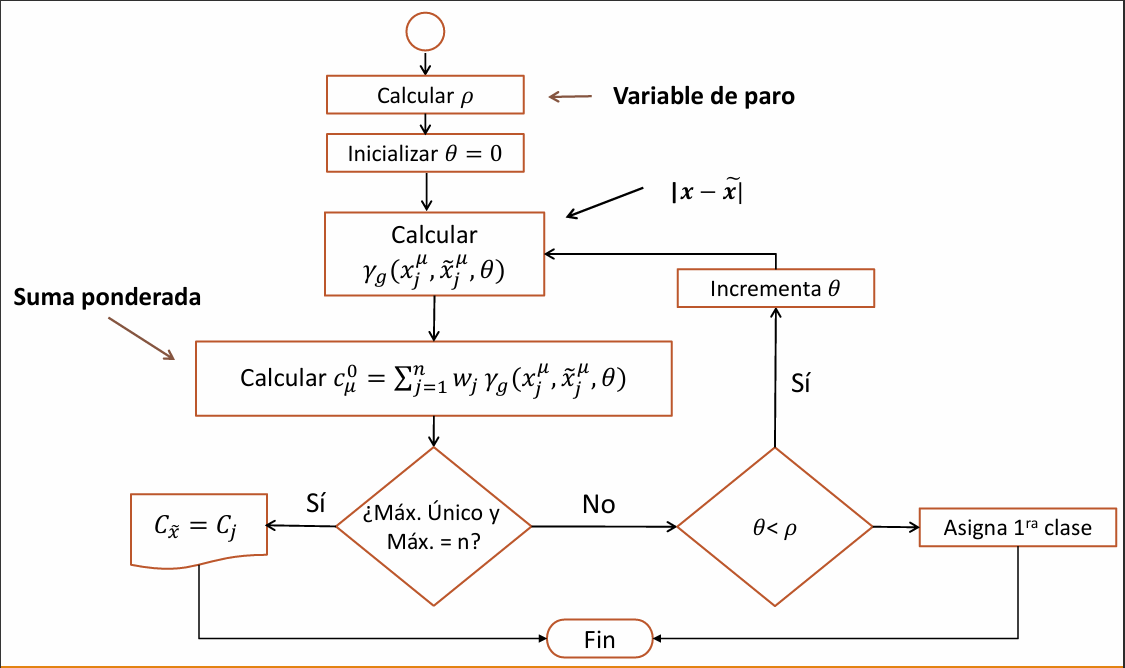

In [28]:
def clasificar_patron(patron_prueba, X_train, y_train, rho):
    n_features = X_train.shape[1]
    theta = 0
    
    # Nuestra validacion principal
    while theta <= rho:
        
        # Calculamos la similitud (Nuestra funcion gamma)
        diferencias = np.abs(patron_prueba - X_train)
        #Esta es la parte donde comparamos si nuestra diferencia es menor o igual a la tolerancia, el astype(int) convierte el true en 1 y False en 
        gamma = (diferencias <= theta).astype(int)
        
        # Pasamos con la suma ponderada, sumando fila por fila, horizontalmente 
        suma_coincidencias = np.sum(gamma, axis=1)
        
        # Verifiamos si es max unico y max=n
        indices_match_perfecto = np.where(suma_coincidencias == n_features)[0]
        #Verificamos que se haya encontrado algun match_perfecto
        if len(indices_match_perfecto) > 0:
            clases_encontradas = y_train[indices_match_perfecto]
            clases_unicas = np.unique(clases_encontradas)
            
            if len(clases_unicas) == 1:
                return clases_unicas[0] 
            
            # Si hay empate, incrementamos theta
        
        if theta < rho:
            theta += 1
        else:
            break
    clases_disponibles = np.unique(y_train)
    return clases_disponibles[0]
        

### Validacion usando K-folds
Ahora es momento de validar el dataset usando K-folds

In [29]:
def kfolds(X,y):
    #Iniciamos Kfolds = 5
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    # Creamos un diccionario para coleccionar las metricas
    acc_global = []
    spec_global = []
    #Acumulamos el resultado de todos los folds para hacer la evaluacion final, almacenando las etiquetas reales y las que el modelo predijo
    y_true_total = []
    y_pred_total = []

    print("-------Clasificador Gamma-------")
    # Inicializamos el fold
    fold = 1 
    #Pasamos los indices para ahorrar memoria
    for train_idx, test_idx in kf.split(X,y):
        # separamos nuestro train y test
        X_train_fold, X_test_fold = X[train_idx], X[test_idx]
        y_train_fold, y_test_fold = y[train_idx], y[test_idx]

        # Llamamos a nuestra funcion de paro
        rho_fold = rho_funcion_maximos(X_train_fold)
        #Guardamos las predicciones de cada fold
        y_pred_fold = []
        #Aqui sacamos la longitud de cada fold para saber cuanto iterar
        n = len(X_test_fold)
        for i in range(n):
            #Aqui es donde guardamos nuestra x
            patron = X_test_fold[i]
            
            prediccion = clasificar_patron(patron, X_train_fold, y_train_fold, rho_fold)
            #Aqui agregamos la prediccion a nuestro prediction fold
            y_pred_fold.append(prediccion)
        #Convertimos la lista a un arreglo
        y_pred_fold = np.array(y_pred_fold)
        #aplanamos el arreglo
        y_true_final = y_test_fold.ravel()
        y_pred_final = np.array(y_pred_fold).ravel()
        #agregamos el resultado a las predicciones y valores reales finales
        y_true_total.extend(y_true_final)
        y_pred_total.extend(y_pred_final)
        
        # Calculamos el accuracy
        acc = accuracy_score(y_true_final, y_pred_final)
        # Obtenemos la matriz de confusion
        cm = confusion_matrix(y_true_final, y_pred_final)
        
        # Calculamos la especificidad
        FP = cm.sum(axis=0) - np.diag(cm)  #Falsos positivos
        FN = cm.sum(axis=1) - np.diag(cm) #Falsos negativos
        TP = np.diag(cm) #Verdaderos positivos
        TN = cm.sum() - (FP + FN + TP) #Verdaderos negativos
        #Ignoramos cualquier division que pueda ser entre 0 o alguna operacion invalida
        with np.errstate(divide='ignore', invalid='ignore'):
            #Calculamos la especcificidad
            spec_per_class = TN / (TN + FP)
            #Convertimos cualquier NaN a 0
            spec_per_class = np.nan_to_num(spec_per_class)
        #Calculamos el accuracy con el totaal de pruebas, cuantas acerto el modelo
        acc = accuracy_score(y_test_fold, y_pred_fold)
        spec_avg = np.mean(spec_per_class)
        #Agregamos el accuracy y la especificidad a nuestra lista para despues ponderarla
        acc_global.append(acc)
        spec_global.append(spec_avg)

        print(f"Fold {fold}: Rho={rho_fold} | Accuracy={acc:.4f} | Specificity={spec_avg:.4f}")
        fold += 1
    promedio_accuracy = np.mean(acc_global)
    promedio_spec = np.mean(spec_global)
    print('-------Resultados finales-------')
    print(f"Accuracy global={promedio_accuracy:.4f} | Specificity={promedio_spec:.4f}")
    disp = ConfusionMatrixDisplay.from_predictions(
        y_true_total, 
        y_pred_total,
        cmap='Blues' 
    )
    
    plt.title("Matriz de Confusión Acumulada (Todos los Folds)")
    plt.show()

### Iris
* Probamos con el dataset iris

Multiplicando todo por 10
Forma de X: (150, 4)
Forma de y: (150,)
-------Clasificador Gamma-------
Fold 1: Rho=79 | Accuracy=1.0000 | Specificity=1.0000
Fold 2: Rho=79 | Accuracy=0.9333 | Specificity=0.9667
Fold 3: Rho=79 | Accuracy=0.9000 | Specificity=0.9500
Fold 4: Rho=79 | Accuracy=1.0000 | Specificity=1.0000
Fold 5: Rho=77 | Accuracy=0.9667 | Specificity=0.9833
-------Resultados finales-------
Accuracy global=0.9600 | Specificity=0.9800


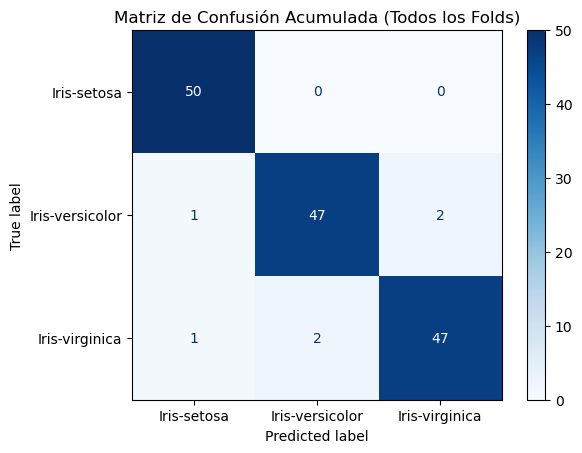

In [30]:
#normalizamos el dataset
df_normalizado = normalizador(iris)
#Pasamos unicamente las variables numericas a X
X = df_normalizado.select_dtypes(include=[np.number]).values.astype(int)
#Colocamos el target y lo aplanamos
y = iris.iloc[:, -1].values.ravel()
#Comprobamos que sea de la misma dimensionalidad
print(f"Forma de X: {X.shape}")
print(f"Forma de y: {y.shape}")
#Llamamos a nuestra validacion k-folds
kfolds(X,y)

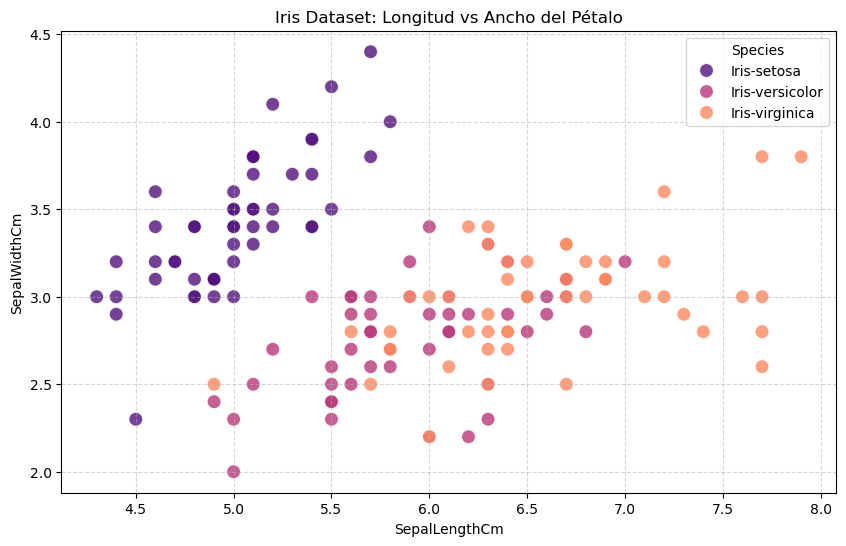

In [54]:
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=iris, 
    x='SepalLengthCm', 
    y='SepalWidthCm', 
    hue='Species',       
    palette='magma',
    s=100, 
    alpha=0.8
)

plt.title("Iris Dataset: Longitud vs Ancho del Pétalo")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### Seeds
* Probamos con el dataset seeds

Multiplicando todo por 10
Forma de X: (209, 8)
Forma de y: (209,)
-------Clasificador Gamma-------
Fold 1: Rho=212 | Accuracy=1.0000 | Specificity=1.0000
Fold 2: Rho=212 | Accuracy=1.0000 | Specificity=1.0000
Fold 3: Rho=212 | Accuracy=1.0000 | Specificity=1.0000
Fold 4: Rho=210 | Accuracy=1.0000 | Specificity=1.0000
Fold 5: Rho=212 | Accuracy=0.9756 | Specificity=0.9877
-------Resultados finales-------
Accuracy global=0.9951 | Specificity=0.9975


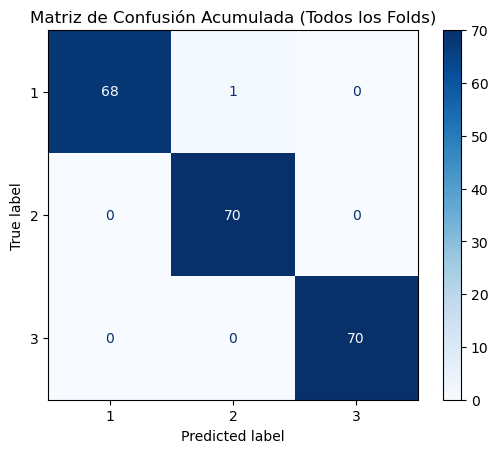

In [31]:
# normalizamos el dataset
df_normalizado = normalizador(seeds)
#Volvemos a seleccionar las columnas numericas
X = df_normalizado.select_dtypes(include=[np.number]).values.astype(int)
#Seleccionamos el target y lo aplanamos
y = seeds.iloc[:, -1].values.ravel()
#Verificamos que tengan la misma dimensionalidad
print(f"Forma de X: {X.shape}")
print(f"Forma de y: {y.shape}")
#Llamamos a nuestra validacion
kfolds(X,y)

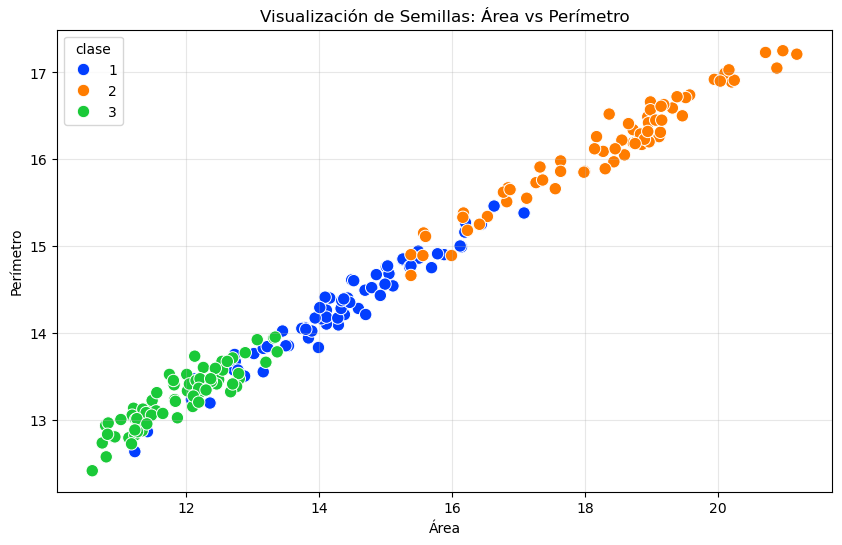

In [51]:
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=seeds, 
    x='area', 
    y='perimetro', 
    hue='clase',      
    palette='bright', 
    s=80
)

plt.title("Visualización de Semillas: Área vs Perímetro")
plt.xlabel("Área")
plt.ylabel("Perímetro")
plt.grid(True, alpha=0.3)
plt.show()

### Cancer
* Probamos con el dataset de cancer

Forma de X: (569, 30)
Forma de y: (569,)
-------Clasificador Gamma-------
Fold 1: Rho=1000 | Accuracy=0.9386 | Specificity=0.9369
Fold 2: Rho=1000 | Accuracy=0.9474 | Specificity=0.9348
Fold 3: Rho=1000 | Accuracy=0.9386 | Specificity=0.9266
Fold 4: Rho=1000 | Accuracy=0.9474 | Specificity=0.9435
Fold 5: Rho=1000 | Accuracy=0.9558 | Specificity=0.9453
-------Resultados finales-------
Accuracy global=0.9455 | Specificity=0.9374


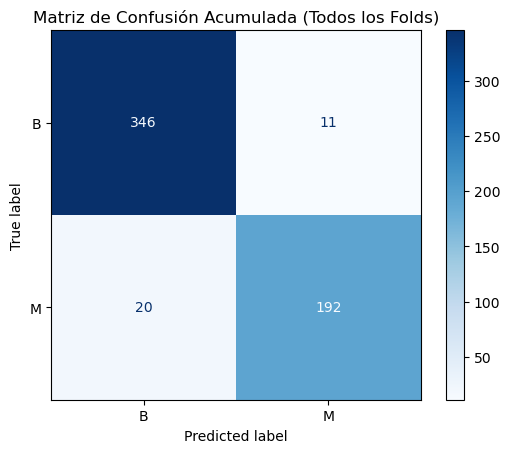

In [54]:
#Normalizamos
df_normalizado = normalizador(cancer)
#Seleccionamos las columnas numericas
X = df_normalizado.select_dtypes(include=[np.number]).values.astype(int)
#Seleccionamos el target y aplanamos
y = cancer['diagnosis'].values.ravel()
#Verificamos dimensionalidad
print(f"Forma de X: {X.shape}")
print(f"Forma de y: {y.shape}")
#Llamamos a nuestra funcion de validacion
kfolds(X,y)

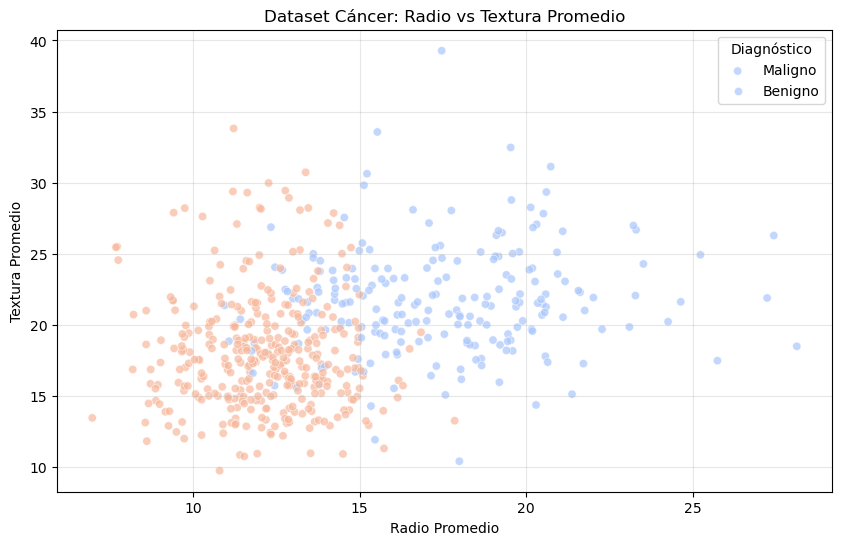

In [58]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=cancer, 
    x='radius_mean', 
    y='texture_mean', 
    hue='diagnosis',       
    palette='coolwarm', 
    alpha=0.7
)

plt.title("Dataset Cáncer: Radio vs Textura Promedio")
plt.xlabel("Radio Promedio")
plt.ylabel("Textura Promedio")
plt.legend(title="Diagnóstico", labels=['Maligno', 'Benigno'])
plt.grid(True, alpha=0.3)
plt.show()

### Segunda parte
* En esta sección impllementaremos el Proceso Gaussiano de clasificador con los 3 datasets que ya cargamos
* Clasificaremos los resultados entre ambos algoritmos
* Calcularemos su desempeño


Cargamos las librerias necesarias

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

Creamos nuestra funcion para el Gaussian Process

In [60]:
def GaussianProcess(X,y):
    #Usamos el StandardScaler debido a la distribucion que sigue esta funcion
    scaler = StandardScaler()
    #Escalamos X
    X_scaled = scaler.fit_transform(X)

    # Configuramos nuestro Kernel, en este caso RBF porque ...
    kernel = 1.0 * RBF(length_scale=1.0)
    #Usamos la misma validacion cruzada para poder comparar resultados
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Alistamos nuestras variables para las metricas
    acc_global = []
    spec_global = []

    # Ajustamos los acumuladores para la matriz de confusi[on total
    y_true_total = []
    y_pred_total = []

    print("-------Gaussian Process-------")
    #Iniciamos con el primer fold
    fold = 1

    # Empezamos la validacion
    for train_index, test_index in skf.split(X_scaled, y):
        # Separamos y guardamos nuestros indices de train y test
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]
        y_train, y_test = y[train_index], y[test_index]
    
    # Inicializamos nuestro modelo
        gpc = GaussianProcessClassifier(kernel=kernel, random_state=42)
    #Entrenamos el modelo
        gpc.fit(X_train, y_train)
    
        # Predecimos
        y_pred = gpc.predict(X_test)
    
        # Guardamos nuestras predicciones 
        y_true_total.extend(y_test)
        y_pred_total.extend(y_pred)
    
    # Calculamos el accuracy
        acc = accuracy_score(y_test, y_pred)
    
        # Calculamos la matriz de confusion del fold 
        cm = confusion_matrix(y_test, y_pred)
    
        # Calculamos la especificidad con la matriz de confusion
        FP = cm.sum(axis=0) - np.diag(cm)  
        FN = cm.sum(axis=1) - np.diag(cm)
        TP = np.diag(cm)
        TN = cm.sum() - (FP + FN + TP)

        # Evitamos división por cero
        with np.errstate(divide='ignore', invalid='ignore'):
            spec_per_class = TN / (TN + FP)
            spec_per_class = np.nan_to_num(spec_per_class) 
        #sacamos el promedio de la especificidad por clase
        spec_avg = np.mean(spec_per_class)
    
        # Guardamos para a las variables globales 
        acc_global.append(acc)
        spec_global.append(spec_avg)
    
        print(f"Fold {fold}: Accuracy={acc:.4f} | Specificity={spec_avg:.4f}")
    
        fold += 1

    print(f"Accuracy Promedio:    {np.mean(acc_global):.4f}")
    print(f"Especificidad Promedio:  {np.mean(spec_global):.4f}")

    disp = ConfusionMatrixDisplay.from_predictions(
        y_true_total,
        y_pred_total,
        cmap='Purples', 
        xticks_rotation='vertical'
    )

    plt.title("Matriz de Confusión")
    plt.show()

Implementamos primero con iris

-------Gaussian Process-------
Fold 1: Accuracy=1.0000 | Specificity=1.0000
Fold 2: Accuracy=1.0000 | Specificity=1.0000
Fold 3: Accuracy=1.0000 | Specificity=1.0000
Fold 4: Accuracy=1.0000 | Specificity=1.0000
Fold 5: Accuracy=1.0000 | Specificity=1.0000
Accuracy Promedio:    1.0000
Especificidad Promedio:  1.0000


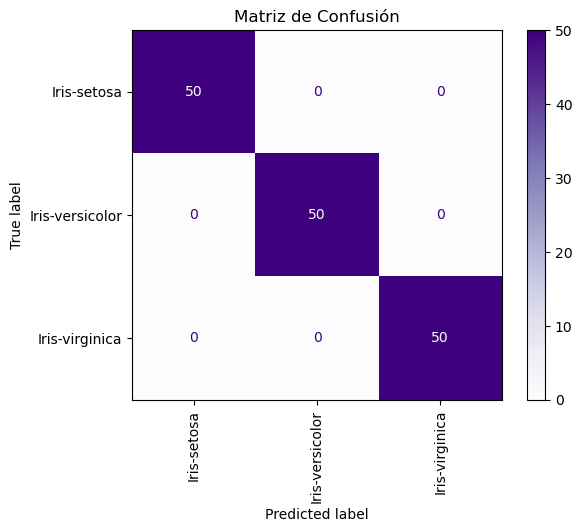

In [61]:
#Separamos nuestras features del target
X = iris.drop('Species', axis=1) 
y = iris['Species']
GaussianProcess(X,y)

-------Gaussian Process-------
Fold 1: Accuracy=0.9524 | Specificity=0.9762
Fold 2: Accuracy=0.9762 | Specificity=0.9881
Fold 3: Accuracy=0.9524 | Specificity=0.9762
Fold 4: Accuracy=1.0000 | Specificity=1.0000
Fold 5: Accuracy=0.9024 | Specificity=0.9519
Accuracy Promedio:    0.9567
Especificidad Promedio:  0.9785


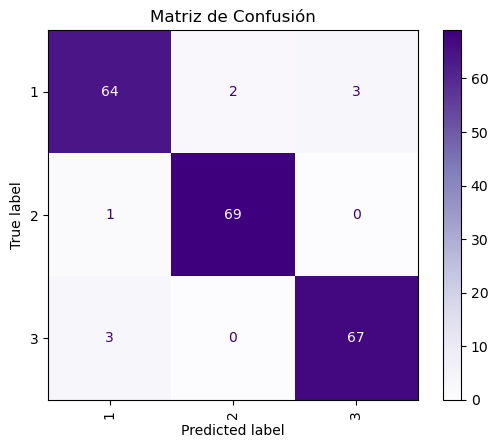

In [62]:
# Separamos nuestras features y target
X = seeds.iloc[:, :-1].values 
y = seeds.iloc[:, -1].values.ravel()
GaussianProcess(X,y)

/home/gipowell/anaconda3/envs/anaconda-banking/lib/python3.11/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: [31]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


-------Gaussian Process-------
Fold 1: Accuracy=0.9737 | Specificity=0.9743
Fold 2: Accuracy=0.9561 | Specificity=0.9419
Fold 3: Accuracy=0.9649 | Specificity=0.9524
Fold 4: Accuracy=1.0000 | Specificity=1.0000
Fold 5: Accuracy=0.9823 | Specificity=0.9762
Accuracy Promedio:    0.9754
Especificidad Promedio:  0.9689


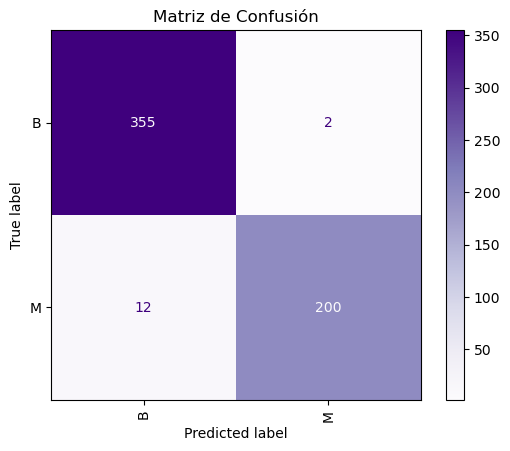

In [63]:
X = cancer.drop('diagnosis', axis=1).values 
y = cancer['diagnosis'].values.ravel()

# Rellenamos los nulos
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
#Llamamos a nuestro clasificador
GaussianProcess(X_imputed,y)

### Comparamos
